In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Google_stock_price.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,3/27/2014 16:00:00,28.32,28.32,27.57,27.85,13052
1,3/28/2014 16:00:00,27.99,28.24,27.86,27.92,41003
2,3/31/2014 16:00:00,28.27,28.27,27.77,27.77,10772
3,4/1/2014 16:00:00,27.86,28.34,27.86,28.28,7932
4,4/2/2014 16:00:00,28.96,30.16,28.03,28.27,146697


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957 entries, 0 to 1956
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1957 non-null   object 
 1   Open    1957 non-null   float64
 2   High    1957 non-null   float64
 3   Low     1957 non-null   float64
 4   Close   1957 non-null   float64
 5   Volume  1957 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 91.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,1957.000000,1957.000000,1957.000000,1957.000000,1.957000e+03
mean,57.810925,58.356413,57.286576,57.844154,1.691049e+06
std,30.773979,31.065762,30.518720,30.807773,8.385191e+05
min,24.660000,24.730000,24.310000,24.560000,7.932000e+03
25%,36.140000,36.410000,35.830000,36.060000,1.198234e+06
50%,52.130000,52.740000,51.420000,52.000000,1.481688e+06
75%,65.490000,66.290000,65.240000,65.770000,1.938658e+06
max,151.000000,151.850000,149.890000,150.710000,1.116494e+07


In [6]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

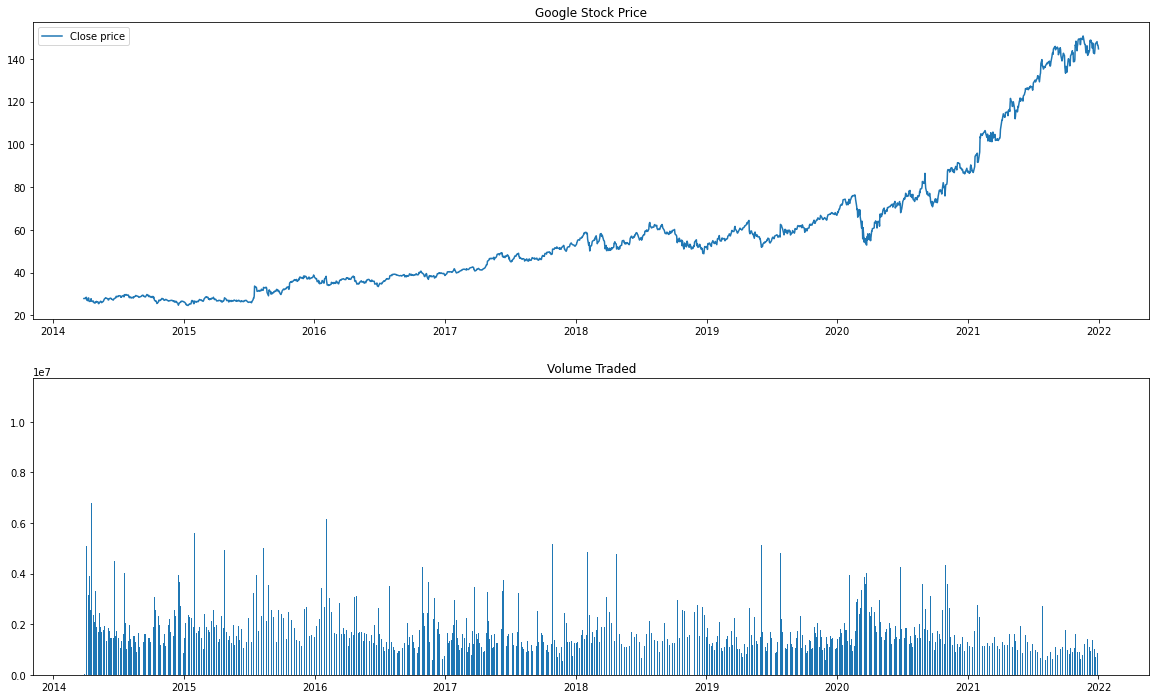

In [94]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Google Stock Price')
plt.plot(df2.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()


# ARIMA Model:-


In [7]:
data = list(df2["Close"])

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  2.0149104180663944
2. P-Value :  0.9986920152065939
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression: 1936
5. Critical Values :
	 1% :  -3.433732227090619
	 5% :  -2.863034058711895
	 10% :  -2.5675653775463596


In [9]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [11]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [28]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1857 100


In [29]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=4.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6587.966, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=5917.351, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.99 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=5692.076, Time=0.33 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=5562.183, Time=0.40 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=5511.233, Time=0.59 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=5484.299, Time=0.44 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=3.41 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=2.33 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=5486.298, Time=1.39 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 14.288 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1857
Model:         

In [50]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(5,2,0))

In [51]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1957
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -3027.545
Date:                Fri, 29 Jul 2022   AIC                           6067.089
Time:                        00:26:53   BIC                           6100.558
Sample:                             0   HQIC                          6079.392
                               - 1957                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8750      0.014    -61.311      0.000      -0.903      -0.847
ar.L2         -0.6540      0.020    -33.208      0.000      -0.693      -0.615
ar.L3         -0.5005      0.021    -24.323      0.000      -0.541      -0.460
ar.L4         -0.3259      0.017    -18.699      0.000      -0.360      -0.292
ar.L5         -0.1682      0.014    -12.390      0.000      -0.195      -0.142
sigma2         1.2954      0.020     64.861      0.000       1.256       1.335
===================================================================================
Ljung-Box (L1) (Q):                   3.50   Jarque-Bera (JB):              3844.18
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):              10.55   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([138.50822385, 137.92721532, 138.73854382, 138.69002614,
       139.20126943, 137.2876789 , 136.24391012, 136.75230047,
       138.39537759, 141.52562171, 143.05711596, 143.91236856,
       143.10023037, 145.65843114, 146.7431492 , 146.1956905 ,
       146.41216511, 144.50437384, 145.10222015, 145.70703949,
       144.82510855, 144.79193318, 141.39980947, 143.10652116,
       143.3148709 , 145.0348773 , 144.45760795, 140.91821629,
       138.50817288, 138.86987329, 140.52820742, 141.29691675,
       142.36041054, 141.58647761, 135.85297692, 133.45997008,
       132.00879478, 135.35523699, 132.61688736, 135.00054555,
       137.69710815, 139.8718978 , 141.28795489, 139.30551414,
       137.22131347, 138.02874445, 142.01867657, 142.2542913 ,
       143.38507367, 144.69234394, 143.43264001, 143.50376705,
       138.37349842, 138.03190854, 139.16293412, 146.59227511,
       147.15536652, 148.99011729, 144.98004191, 146.6203269 ,
       148.14041514, 148.94438707, 149.88529037, 149.51

In [53]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2021-08-11 16:00:00    138.508224
2021-08-12 16:00:00    137.927215
2021-08-13 16:00:00    138.738544
2021-08-16 16:00:00    138.690026
2021-08-17 16:00:00    139.201269
                          ...    
2021-12-27 16:00:00    147.229551
2021-12-28 16:00:00    148.547539
2021-12-29 16:00:00    147.177680
2021-12-30 16:00:00    147.061465
2021-12-31 16:00:00    146.351052
Length: 100, dtype: float64

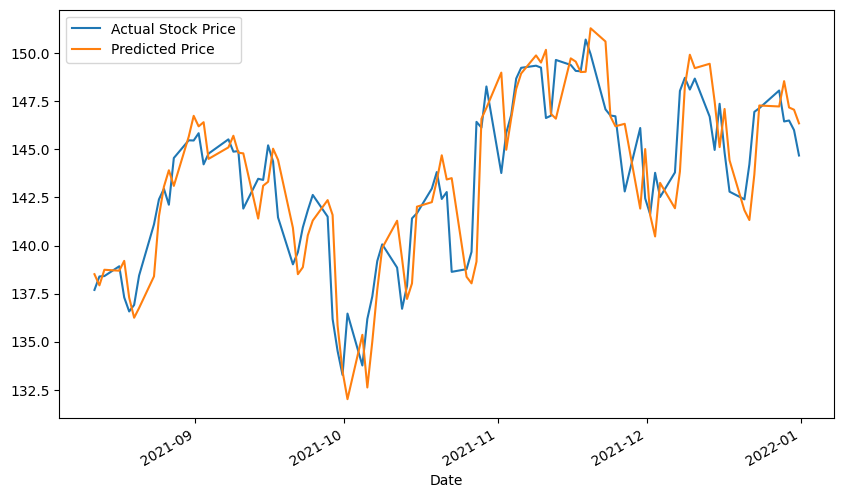

In [107]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

<Figure size 1000x600 with 0 Axes>

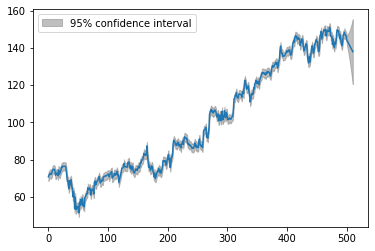

In [70]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [88]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

2.123602043257979

In [89]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.7353118784734014

# Predicting Future 10 values:

In [73]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([146.35105209, 144.30828537, 143.80271431, 143.10460191,
       142.54768338, 141.8889458 , 141.20748363, 140.62709557,
       140.01044131, 139.38023619, 138.75955139])

In [84]:
import datetime
start_date = datetime.datetime(2021,12,31)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [85]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2021-12-31    146.351052
2022-01-01    144.308285
2022-01-02    143.802714
2022-01-03    143.104602
2022-01-04    142.547683
2022-01-05    141.888946
2022-01-06    141.207484
2022-01-07    140.627096
2022-01-08    140.010441
2022-01-09    139.380236
2022-01-10    138.759551
dtype: float64

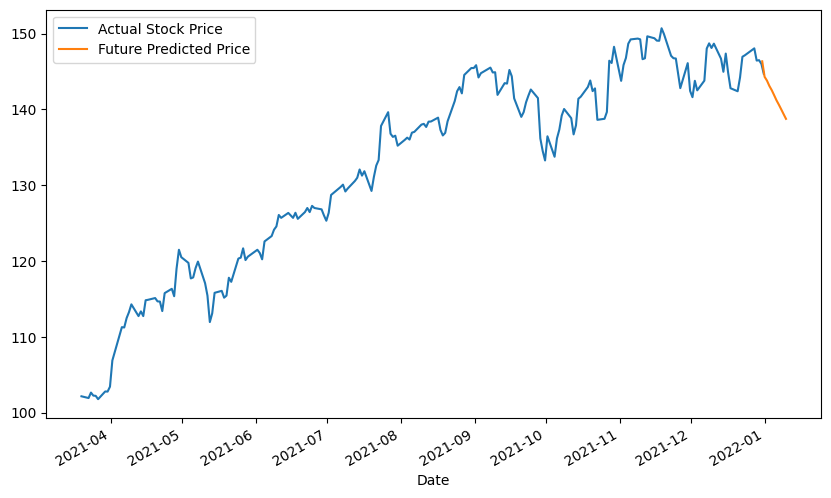

In [86]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

# Comparing predicted prices with real prices
 

In [96]:
check_df = pd.read_csv("Google_stock_price-future_values.csv")

In [98]:
check_df.Date= pd.to_datetime(check_df.Date)
check_df2 =check_df.set_index('Date')

In [125]:
check_df2

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03 16:00:00,144.48,145.55,143.50,145.07,1261225
2022-01-04 16:00:00,145.55,146.61,143.82,144.42,1146389
2022-01-05 16:00:00,144.18,144.30,137.52,137.65,2482076
2022-01-06 16:00:00,137.50,139.69,136.76,137.55,1452452
2022-01-07 16:00:00,137.91,138.25,135.79,137.00,970412
2022-01-10 16:00:00,135.10,138.64,133.14,138.57,1704784
2022-01-11 16:00:00,138.18,140.33,136.81,140.02,1175062


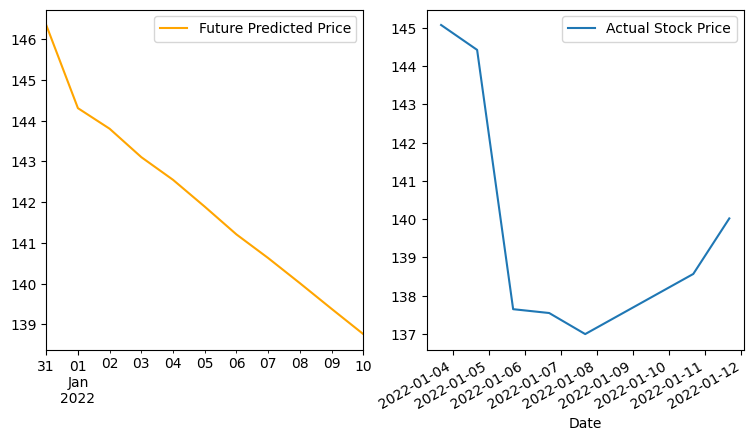

In [123]:
plt.figure(figsize=(9,5), dpi=100)
plt.subplot(1, 2, 1)
pred_future2.plot(label='Future Predicted Price', legend=True, color='orange')
plt.subplot(1, 2, 2)
check_df2['Close'].plot(label='Actual Stock Price', legend=True)
plt.show()